---

# Cryptocurrency Prediction
**By: Victoria Agboola**

### Project Background

In this project, we tackle the challenge of predicting cryptocurrency price movements. The approach began with a thorough exploratory data analysis to understand our dataset, followed by visualizations to identify trends. The data preparation phase involved segmenting the dataset into training and test subsets, handling missing values through median imputation, and normalizing the data for consistency.

Advancing to feature engineering, we crafted polynomial features to illuminate potential interactions that could influence price predictions. Our exploration of modeling techniques was comprehensive, starting with dense neural networks and advancing to include regularized versions and RNN layers, specifically LSTM and simpleRNN, to capture temporal dependencies. Conscious of class imbalance, we incorporated class weights and experimented with CNN layers to detect subtle patterns.

We adhered to a rigorous evaluation process, employing stratified k-fold cross-validation to ensure the models' generalizability and conducted a detailed performance assessment to identify the most accurate predictive approach.


### Project Goal
The goal of this project is to predict whether the price of crypto currency will go up (1) or down (0) 2 weeks from the day of prediction, which is indicated by "Target" column by using the following information:


### Exploratory Data Analysis

In [ ]:
#https://drive.google.com/file/d/1DaGuJYwKgAOH87HE7Rz7om34RgWB1IrI/view?usp=drive_link
!gdown  1DaGuJYwKgAOH87HE7Rz7om34RgWB1IrI

Downloading...
From: https://drive.google.com/uc?id=1DaGuJYwKgAOH87HE7Rz7om34RgWB1IrI
To: /content/train.csv
100% 1.43M/1.43M [00:00<00:00, 89.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import backend as K
import keras
from keras import layers
from keras import initializers
import seaborn as sns

os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Flatten, Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2660 non-null   int64  
 1   TR_1_EventInd  73 non-null     float64
 2   TR_2_EventInd  61 non-null     float64
 3   TR_3_EventInd  97 non-null     float64
 4   feature_10_A   2212 non-null   float64
 5   feature_10_B   1843 non-null   float64
 6   feature_10_F   2212 non-null   float64
 7   feature_10_G   2212 non-null   float64
 8   feature_1_A    1844 non-null   float64
 9   feature_1_B    1844 non-null   float64
 10  feature_1_C    1840 non-null   float64
 11  feature_1_D    1840 non-null   float64
 12  feature_1_E    1742 non-null   float64
 13  feature_1_F    1844 non-null   float64
 14  feature_1_G    1844 non-null   float64
 15  feature_2_A    1844 non-null   float64
 16  feature_2_B    1844 non-null   float64
 17  feature_2_C    1840 non-null   float64
 18  feature_

In [ ]:
data.head()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
0,1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.049,1.542456,-0.274727,0.0,0.0,1.0,0
1,2,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,1,0.015,1.287473,-1.140626,NaN,NaN,NaN,0
2,3,NaN,NaN,NaN,0.0,0.023,0.0,0.0,1.0,0.004,...,0.0,1.0,1,0.006,0.251501,-1.221567,NaN,NaN,NaN,0
3,4,NaN,NaN,NaN,1.0,0.019,0.0,2.0,0.0,0.005,...,0.0,0.0,1,0.039,1.673783,0.527796,NaN,NaN,NaN,1
4,5,NaN,NaN,1.0,1.0,0.023,0.0,2.0,1.0,0.014,...,1.0,2.0,0,0.037,0.263406,-0.301984,NaN,NaN,NaN,0


In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
# Statistical summary of numerical features
data.describe()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
count,73.0,61.0,97.0,2212.000000,1843.000000,2212.0,2212.000000,1844.000000,1844.000000,1840.000000,...,1843.000000,1843.000000,2660.000000,2660.000000,2660.000000,2660.000000,95.000000,95.000000,95.000000,2660.000000
mean,1.0,1.0,1.0,0.394213,0.027890,0.0,0.457052,0.480477,0.008254,0.093747,...,0.385784,0.880087,0.525564,0.044619,0.215647,0.040449,1.052632,8.000000,16.010526,0.567669
std,0.0,0.0,0.0,0.488792,0.024328,0.0,0.788577,0.499754,0.004721,1.255044,...,0.486912,1.320616,0.499440,0.037747,1.260185,1.054915,1.553092,17.953842,17.614365,0.495493
min,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002000,-3.217639,...,0.000000,0.000000,0.000000,0.003000,-3.360669,-2.381170,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,0.000000,0.015000,0.0,0.000000,0.000000,0.005000,-0.945444,...,0.000000,0.000000,0.000000,0.020000,-0.785635,-0.728389,0.000000,0.000000,3.500000,0.000000
50%,1.0,1.0,1.0,0.000000,0.022000,0.0,0.000000,0.000000,0.007000,0.145855,...,0.000000,0.000000,1.000000,0.034000,0.253407,-0.134176,0.000000,0.000000,11.000000,1.000000
75%,1.0,1.0,1.0,1.000000,0.033000,0.0,1.000000,1.000000,0.010000,1.110579,...,1.000000,1.000000,1.000000,0.056000,1.253811,0.674400,2.000000,6.500000,18.500000,1.000000
max,1.0,1.0,1.0,1.000000,0.419000,0.0,4.000000,1.000000,0.054000,2.955631,...,1.000000,12.000000,1.000000,0.388000,3.038010,3.405693,7.000000,100.000000,100.000000,1.000000


In [ ]:

# Count of missing values in each column
data.isnull().sum()



TR_1_EventInd    2587
TR_2_EventInd    2599
TR_3_EventInd    2563
feature_10_A      448
feature_10_B      817
                 ... 
feature_X_D         0
index_1          2565
index_2          2565
index_3          2565
Target              0
Length: 77, dtype: int64

### Visualizations

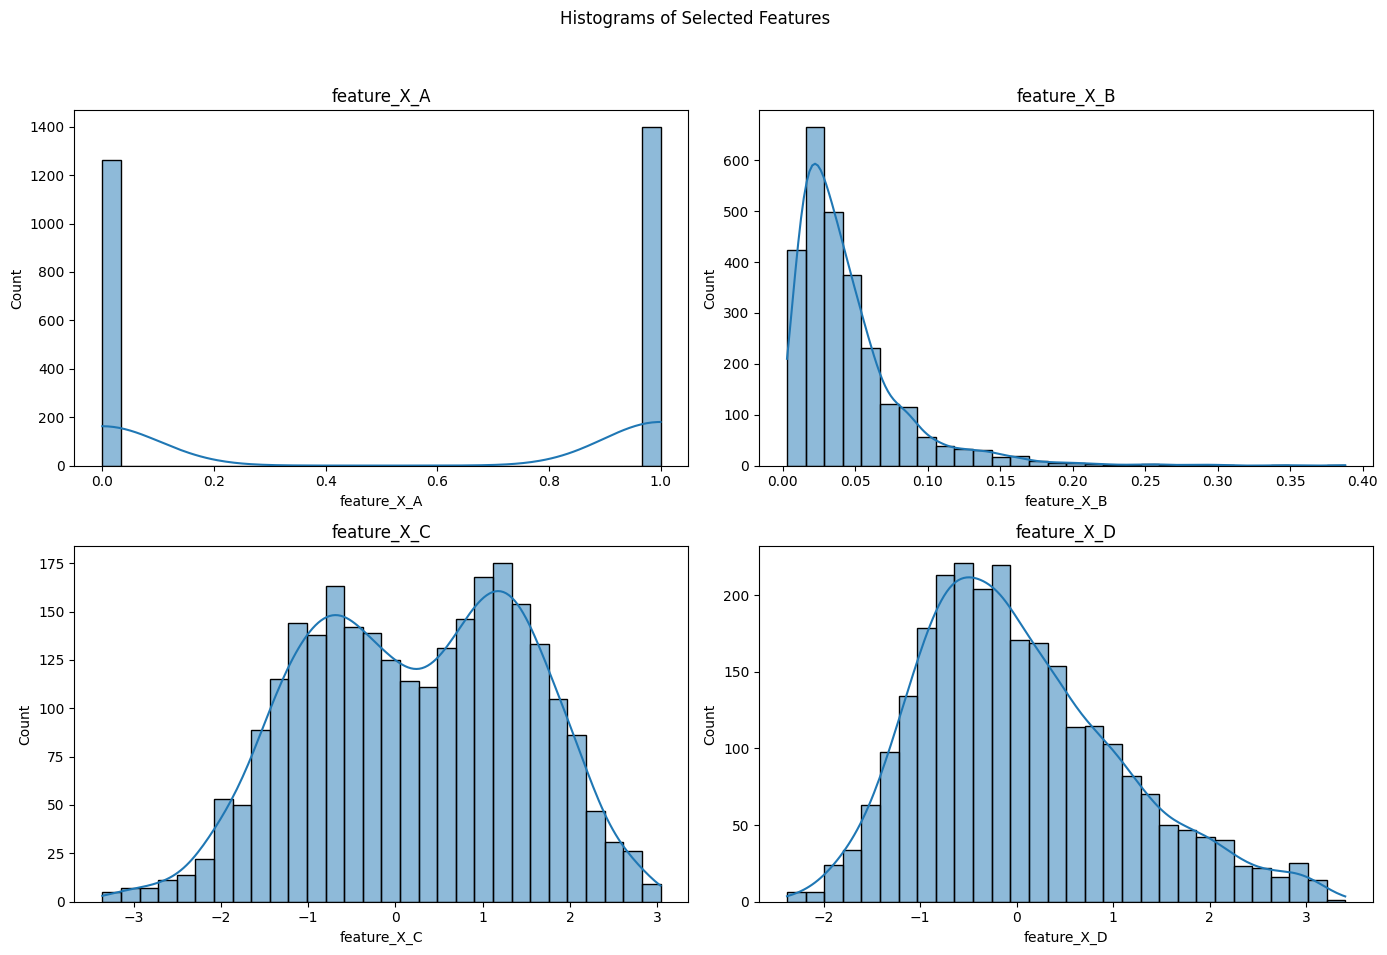

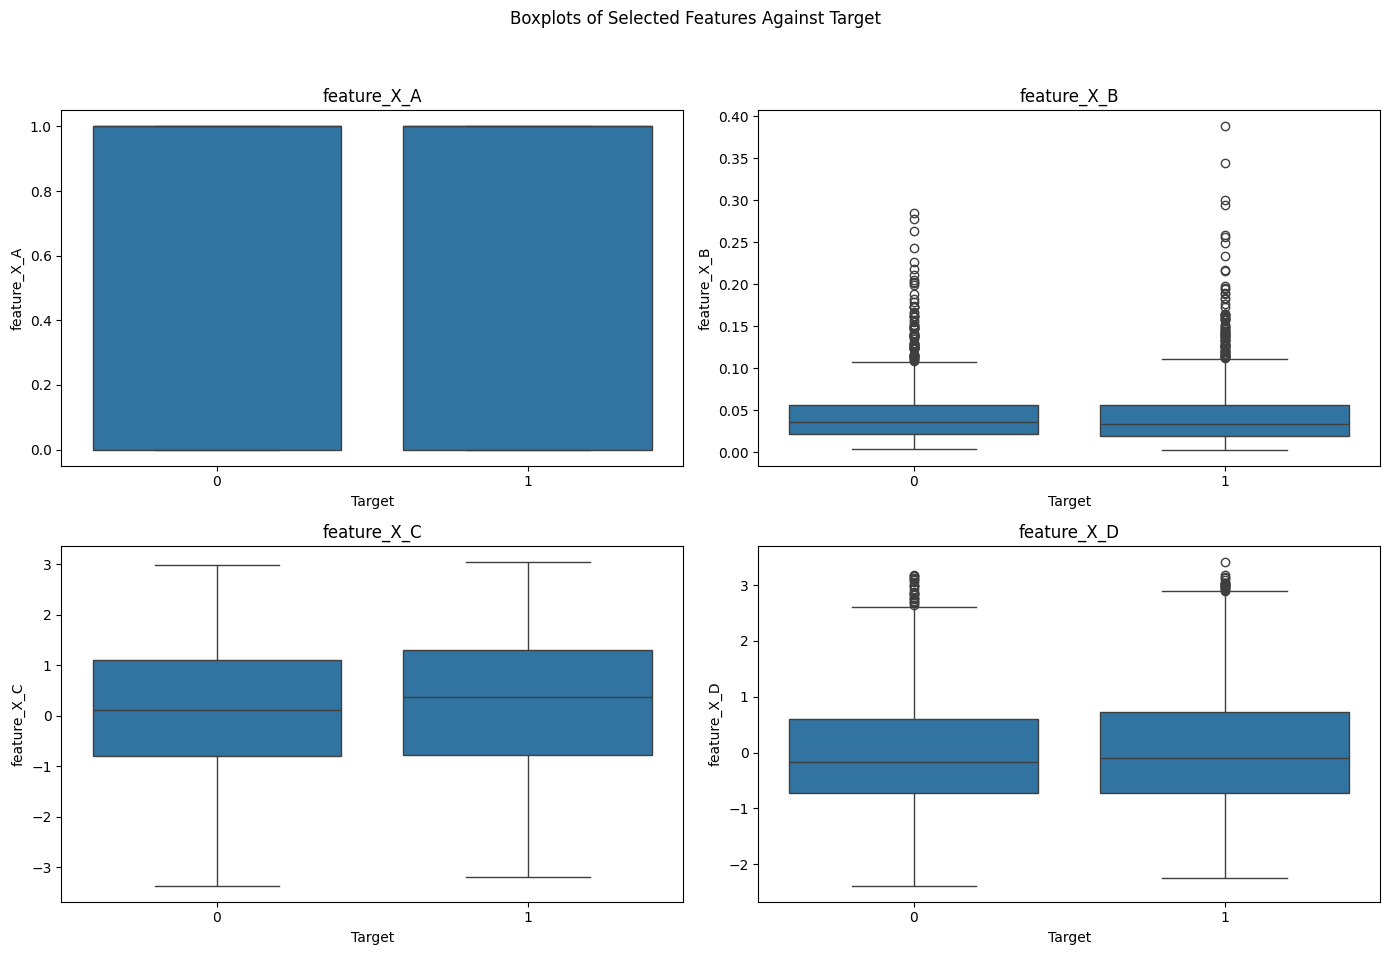

In [ ]:
# Selecting a subset of features for detailed visualization
selected_features = ['feature_X_A', 'feature_X_B', 'feature_X_C', 'feature_X_D']

# Plotting histograms for the selected features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Histograms of Selected Features')

for i, feature in enumerate(selected_features):
    sns.histplot(data[feature], bins=30, ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plotting boxplots for the selected features against the Target variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Boxplots of Selected Features Against Target')

for i, feature in enumerate(selected_features):
    sns.boxplot(x='Target', y=feature, data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


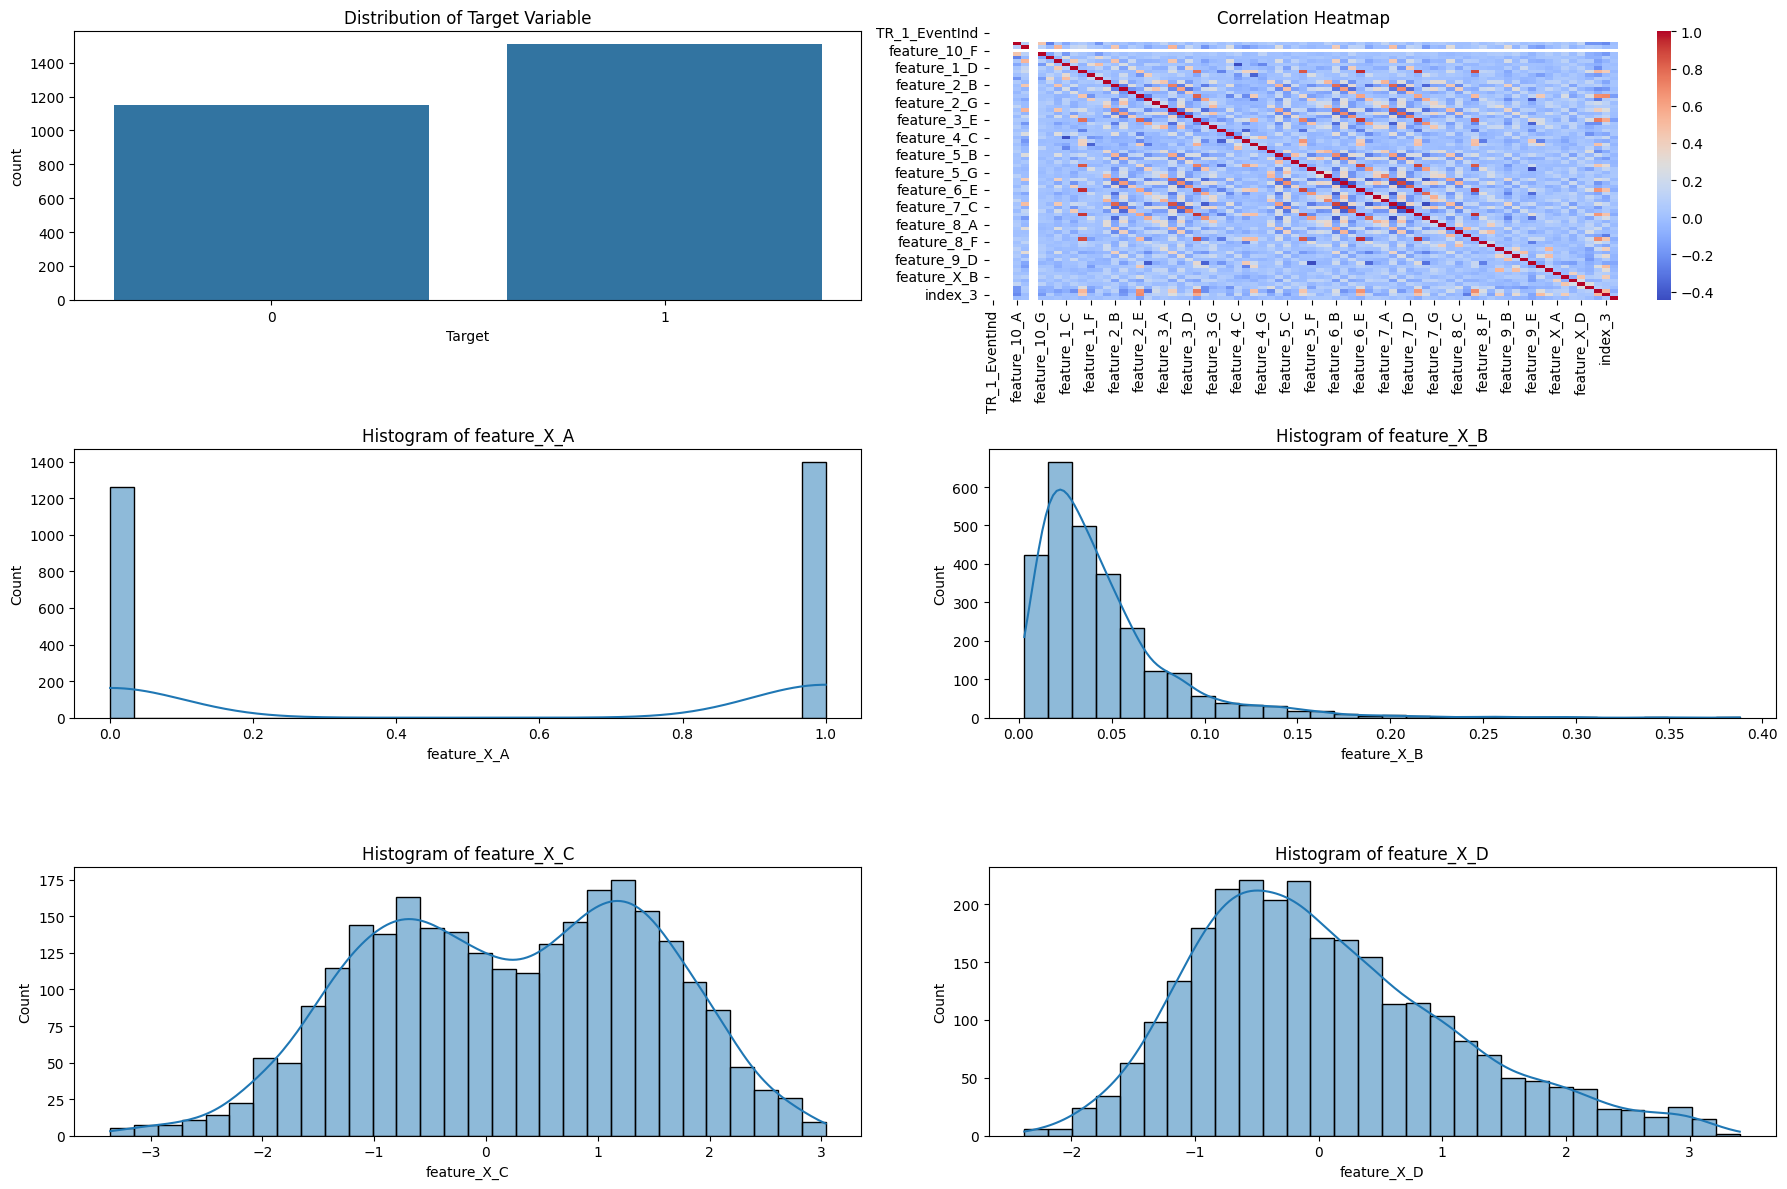

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Distribution of the Target Variable
plt.subplot(3, 2, 1)
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')

# Correlation Heatmap
plt.subplot(3, 2, 2)
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')

# Histograms for Selected Features
features_to_plot = ['feature_X_A', 'feature_X_B', 'feature_X_C', 'feature_X_D']
for i, feature in enumerate(features_to_plot, start=3):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

### Data Prep

In [ ]:
# Missing Values Count
missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0].sort_values(ascending=False)

TR_2_EventInd    2599
TR_1_EventInd    2587
index_2          2565
index_1          2565
index_3          2565
                 ... 
feature_4_A       745
feature_4_G       745
feature_10_A      448
feature_10_G      448
feature_10_F      448
Length: 72, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)  # Features
y = data['Target']               # Target variable

# Splitting the data:
X_train, X_test = X.iloc[:-400], X.iloc[-400:]
y_train, y_test = y.iloc[:-400], y.iloc[-400:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2260, 76), (400, 76), (2260,), (400,))

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the SimpleImputer to use the median for filling missing values
imputer = SimpleImputer(strategy='median')

# Initialize the KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#threshold = 50
#missing_values_percentage = data.isnull().sum() / len(data) * 100
#columns_to_delete = missing_values_percentage[missing_values_percentage > threshold].index
#data = data.drop(columns=columns_to_delete)

# Fit the imputer on the training data (excluding the target variable)
imputer.fit(X_train)

# Transform the training data and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back into pandas DataFrames for ease of use later on
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Checking the first few rows to confirm the transformation
X_train_imputed_df.head()


,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
0,1.0,1.0,1.0,0.0,0.022,0.0,0.0,0.0,0.007,0.157275,...,3.876000,0.0,0.0,1.0,0.049,1.542456,-0.274727,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.022,0.0,0.0,0.0,0.007,0.157275,...,3.876000,0.0,0.0,1.0,0.015,1.287473,-1.140626,0.0,0.0,11.0
2,1.0,1.0,1.0,0.0,0.023,0.0,0.0,1.0,0.004,-0.224414,...,2.161857,0.0,1.0,1.0,0.006,0.251501,-1.221567,0.0,0.0,11.0
3,1.0,1.0,1.0,1.0,0.019,0.0,2.0,0.0,0.005,-1.372548,...,2.416500,0.0,0.0,1.0,0.039,1.673783,0.527796,0.0,0.0,11.0
4,1.0,1.0,1.0,1.0,0.023,0.0,2.0,1.0,0.014,1.664108,...,3.438571,1.0,2.0,0.0,0.037,0.263406,-0.301984,0.0,0.0,11.0


we also tried to use delete the columns that has over 50% missing values and KNN for imputer, but result didn't improve

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_imputed_df)

# Transform both the training and testing sets
X_train_scaled = scaler.transform(X_train_imputed_df)
X_test_scaled = scaler.transform(X_test_imputed_df)

# Convert the scaled arrays back into pandas DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_imputed_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_imputed_df.columns)

# Let's look at the first few rows of the scaled training data
X_train_scaled_df.head()


,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
0,0.0,0.0,0.0,-0.695639,-0.188223,0.0,-0.519320,-0.708985,-0.219309,0.035289,...,-0.068516,-0.602568,-0.519209,0.953302,0.124694,1.076794,-0.293134,-0.099615,-0.074446,-2.841435
1,0.0,0.0,0.0,-0.695639,-0.188223,0.0,-0.519320,-0.708985,-0.219309,0.035289,...,-0.068516,-0.602568,-0.519209,0.953302,-0.796689,0.872810,-1.116972,-0.099615,-0.074446,-0.049780
2,0.0,0.0,0.0,-0.695639,-0.138412,0.0,-0.519320,1.410467,-1.001072,-0.332781,...,-1.512498,-0.602568,0.329859,0.953302,-1.040584,0.044044,-1.193981,-0.099615,-0.074446,-0.049780
3,0.0,0.0,0.0,1.437528,-0.337656,0.0,2.248754,-0.708985,-0.740485,-1.439950,...,-1.297989,-0.602568,-0.519209,0.953302,-0.146301,1.181854,0.470406,-0.099615,-0.074446,-0.049780
4,0.0,0.0,0.0,1.437528,-0.138412,0.0,2.248754,1.410467,1.604806,1.488358,...,-0.437003,1.659564,1.178927,-1.048986,-0.200500,0.053568,-0.319067,-0.099615,-0.074446,-0.049780


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


# Create a PolynomialFeatures object with degree 2 to generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the polynomial features generator to the training data
X_train_poly = poly.fit_transform(X_train_scaled_df)

# Transform the test data using the same transformer
X_test_poly = poly.transform(X_test_scaled_df)

# Convert the generated polynomial features back to a dataframe
X_train_poly_df = pd.DataFrame(X_train_poly,
                               columns=poly.get_feature_names_out(input_features=X_train_scaled_df.columns))

X_test_poly_df = pd.DataFrame(X_test_poly,
                              columns=poly.get_feature_names_out(input_features=X_test_scaled_df.columns))


# Model Development and Evaluation




## Dense Neural Network for Binary Classification

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model definition
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_poly_df.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Using Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['acc'])  # Tracking accuracy

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               374656    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Whether to restore model weights from the epoch with the best value of the monitored quantity

# Train the model with early stopping
history = model.fit(X_train_poly_df, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])  # Include early stopping in the callbacks


Epoch 1/50
57/57 [==============================] - 2s 14ms/step - loss: 0.9566 - acc: 0.5271 - val_loss: 0.7284 - val_acc: 0.5420
Epoch 2/50
57/57 [==============================] - 1s 9ms/step - loss: 0.7973 - acc: 0.5470 - val_loss: 0.6964 - val_acc: 0.5531
Epoch 3/50
57/57 [==============================] - 0s 9ms/step - loss: 0.8087 - acc: 0.5409 - val_loss: 0.6918 - val_acc: 0.5597
Epoch 4/50
57/57 [==============================] - 1s 9ms/step - loss: 0.7587 - acc: 0.5619 - val_loss: 0.6910 - val_acc: 0.5487
Epoch 5/50
57/57 [==============================] - 0s 9ms/step - loss: 0.7028 - acc: 0.5752 - val_loss: 0.6938 - val_acc: 0.5686
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.7101 - acc: 0.5752 - val_loss: 0.6923 - val_acc: 0.5664
Epoch 7/50
57/57 [==============================] - 1s 9ms/step - loss: 0.6794 - acc: 0.5868 - val_loss: 0.6881 - val_acc: 0.5575
Epoch 8/50
57/57 [==============================] - 1s 9ms/step - loss: 0.6764 - acc: 0.6

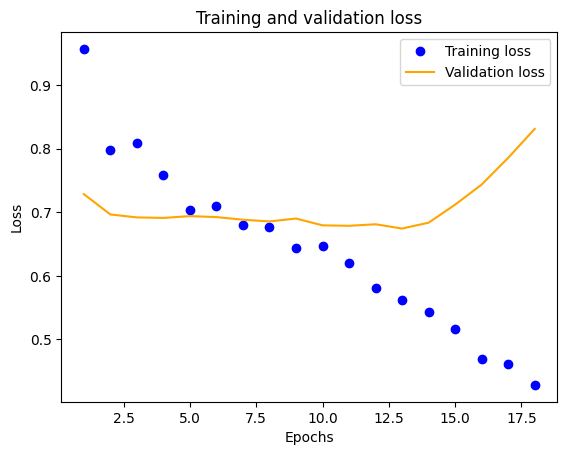

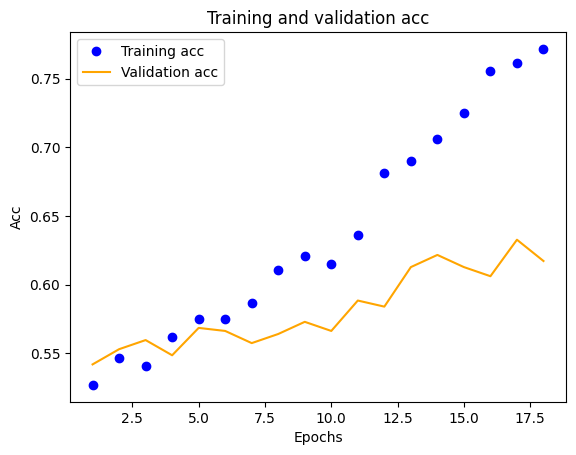

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 4ms/step
[[ 72 103]
 [ 34 191]]
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       175
           1       0.65      0.85      0.74       225

    accuracy                           0.66       400
   macro avg       0.66      0.63      0.62       400
weighted avg       0.66      0.66      0.64       400



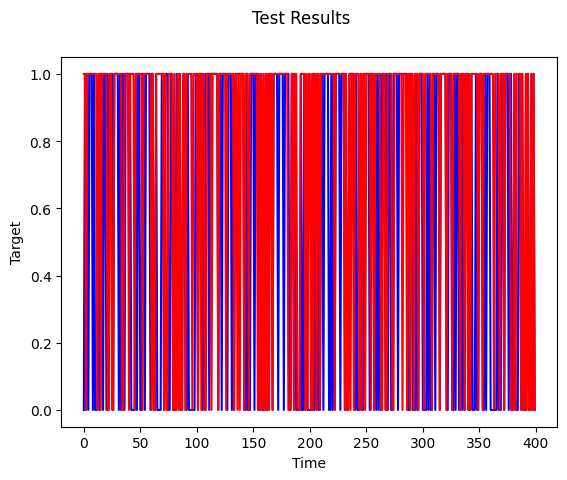

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)
# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

This model development and evaluation phase indicates a deep learning architecture primarily composed of dense layers and dropout applied to manage overfitting. Training incorporates early stopping, which rightly halts the process once the validation loss ceases to decrease, suggesting potential overfitting as the training loss continues to drop. The learning curves highlight this disconnect, as training accuracy improves without corresponding increases in validation accuracy. Performance metrics, including a confusion matrix, demonstrate reasonable predictive capabilities, albeit with a skew towards one class, hinting at the possibility of an imbalanced dataset or the need for a more nuanced approach to classification. Visual comparison of actual and predicted targets suggests areas where model predictions could be calibrated for better alignment with observed data.

## Regularized Dense Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_poly_df.shape[1],), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_poly_df, y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=64,
                    callbacks=[early_stopping])



Epoch 1/200
29/29 [==============================] - 3s 25ms/step - loss: 1.0103 - accuracy: 0.5199 - val_loss: 0.9609 - val_accuracy: 0.5575
Epoch 2/200
29/29 [==============================] - 0s 14ms/step - loss: 0.8286 - accuracy: 0.5846 - val_loss: 0.8866 - val_accuracy: 0.5708
Epoch 3/200
29/29 [==============================] - 0s 15ms/step - loss: 0.7863 - accuracy: 0.6167 - val_loss: 0.8707 - val_accuracy: 0.5752
Epoch 4/200
29/29 [==============================] - 0s 13ms/step - loss: 0.7359 - accuracy: 0.6543 - val_loss: 0.8505 - val_accuracy: 0.5885
Epoch 5/200
29/29 [==============================] - 0s 14ms/step - loss: 0.6811 - accuracy: 0.7030 - val_loss: 0.8527 - val_accuracy: 0.5951
Epoch 6/200
29/29 [==============================] - 0s 14ms/step - loss: 0.6355 - accuracy: 0.7290 - val_loss: 0.8473 - val_accuracy: 0.6150
Epoch 7/200
29/29 [==============================] - 0s 13ms/step - loss: 0.6252 - accuracy: 0.7356 - val_loss: 0.8554 - val_accuracy: 0.5996
Epoch 

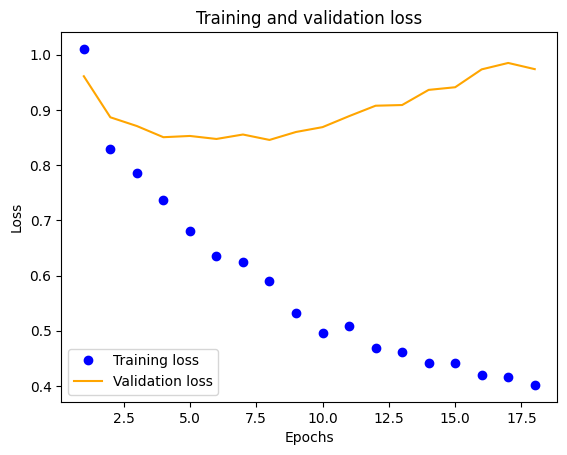

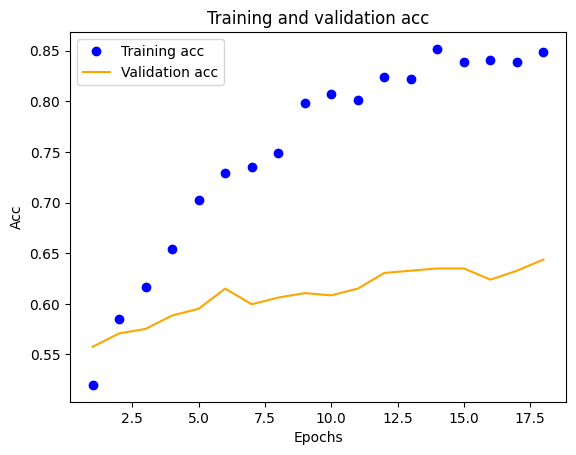

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step
[[ 88  87]
 [ 55 170]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       175
           1       0.66      0.76      0.71       225

    accuracy                           0.65       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.64      0.65      0.64       400



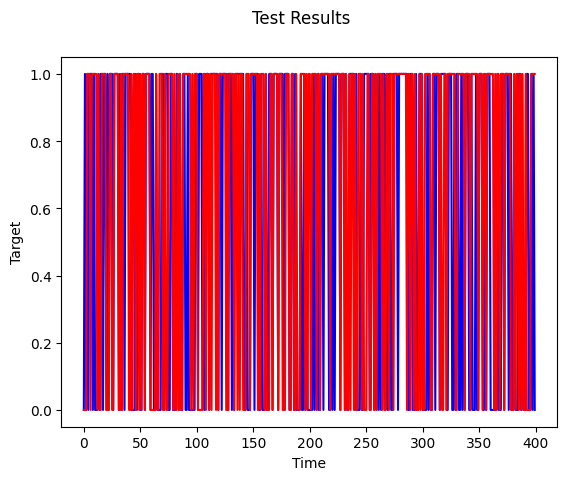

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)
# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

The learning curve plots indicate that while the training loss decreases consistently, the validation loss does not show a similar improvement, suggesting a disparity between training and validation performance. The accuracy plots reveal that the training accuracy surpasses validation accuracy, which often signals overfitting. Nonetheless, the final classification report shows a decent balance between precision and recall for both classes, although the model appears to perform better on the positive class. The bar chart illustrates the comparison between predicted and actual values over time, showing a discernible pattern in the model’s predictions, which may warrant further investigation to understand any underlying bias or systematic error.

## Enhanced Regularized Dense Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

# Define the model with added complexity and regularization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_poly_df.shape[1],), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model with the new callbacks
history = model.fit(X_train_poly_df, y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)  # Use verbose=2 for less verbose output

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_poly_df, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/200
29/29 - 3s - loss: 1.1147 - accuracy: 0.5210 - val_loss: 1.0102 - val_accuracy: 0.5465 - lr: 0.0010 - 3s/epoch - 110ms/step
Epoch 2/200
29/29 - 1s - loss: 0.9116 - accuracy: 0.6344 - val_loss: 0.9952 - val_accuracy: 0.5597 - lr: 0.0010 - 584ms/epoch - 20ms/step
Epoch 3/200
29/29 - 1s - loss: 0.8275 - accuracy: 0.6814 - val_loss: 0.9878 - val_accuracy: 0.5907 - lr: 0.0010 - 544ms/epoch - 19ms/step
Epoch 4/200
29/29 - 1s - loss: 0.7826 - accuracy: 0.7334 - val_loss: 0.9507 - val_accuracy: 0.5951 - lr: 0.0010 - 552ms/epoch - 19ms/step
Epoch 5/200
29/29 - 1s - loss: 0.6981 - accuracy: 0.7644 - val_loss: 0.9666 - val_accuracy: 0.6173 - lr: 0.0010 - 557ms/epoch - 19ms/step
Epoch 6/200
29/29 - 1s - loss: 0.6566 - accuracy: 0.7876 - val_loss: 0.9661 - val_accuracy: 0.6195 - lr: 0.0010 - 542ms/epoch - 19ms/step
Epoch 7/200
29/29 - 1s - loss: 0.6142 - accuracy: 0.8081 - val_loss: 0.9965 - val_accuracy: 0.6150 - lr: 0.0010 - 545ms/epoch - 19ms/step
Epoch 8/200
29/29 - 1s - loss: 0.591

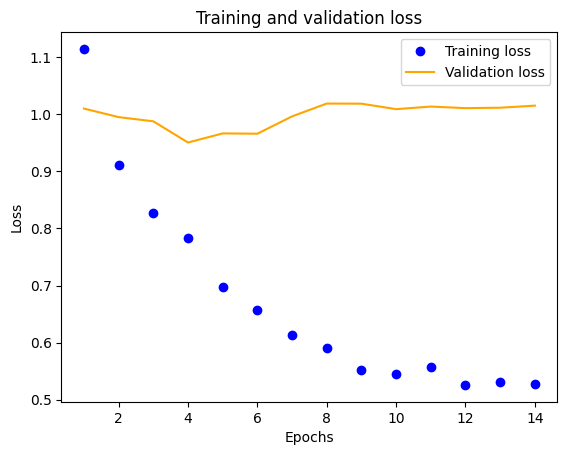

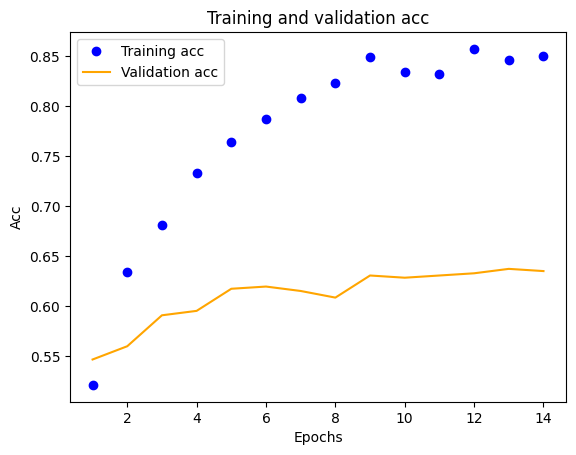

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 6ms/step
[[ 76  99]
 [ 60 165]]
              precision    recall  f1-score   support

           0       0.56      0.43      0.49       175
           1       0.62      0.73      0.67       225

    accuracy                           0.60       400
   macro avg       0.59      0.58      0.58       400
weighted avg       0.60      0.60      0.59       400



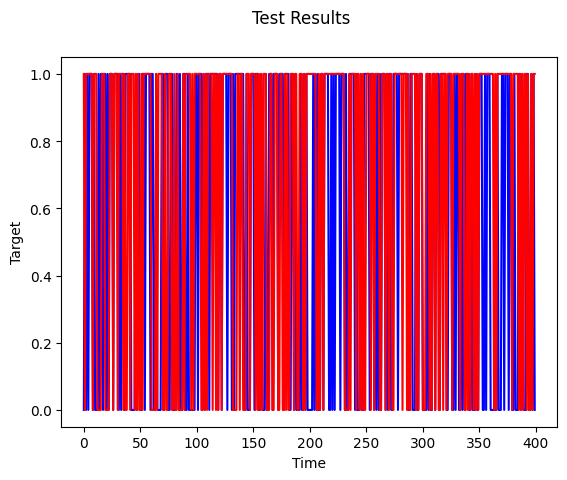

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)
# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

The training process indicates the model is experiencing overfitting, as reflected by the validation loss which begins to plateau and then increases while the training loss continues to decrease. The use of ReduceLROnPlateau is evident, adjusting the learning rate in response to the lack of improvement in validation loss, suggesting an attempt to refine model learning during training. Despite these efforts, the test accuracy reveals room for improvement, and the discrepancy between training and validation performance persists. The classification report suggests that the model is better at identifying one class, as seen in the higher recall for class 1. The precision for class 0 is higher, but the recall is lower, indicating more false negatives for that class. The bar chart visualizes the alternating correct and incorrect predictions, providing a stark representation of the model’s performance over the dataset.

## Stratified K-Fold Cross-Validation for Neural Network

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# Number of folds
n_splits = 5

# Define the K-fold cross validator
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)

# For storing the accuracy of each fold
fold_no = 1
accuracies = []

for train, test in kfold.split(X_train_poly_df, y_train):
    # Define the model architecture
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_poly_df.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X_train_poly_df.iloc[train], y_train.iloc[train],
                        batch_size=64,
                        epochs=100,
                        verbose=0,
                        callbacks=[
                            EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                            ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=0)
                        ],
                        validation_split=0.2)

    # Generate generalization metrics
    scores = model.evaluate(X_train_poly_df.iloc[test], y_train.iloc[test], verbose=0)
    accuracies.append(scores[1])
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]}; {model.metrics_names[0]} of {scores[0]}')

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(accuracies)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Accuracy: {accuracies[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(accuracies)} (+- {np.std(accuracies)})')
print('------------------------------------------------------------------------')


Training for fold 1 ...
Score for fold 1: accuracy of 0.5530973672866821; loss of 0.7013119459152222
Training for fold 2 ...
Score for fold 2: accuracy of 0.6194690465927124; loss of 0.7161371111869812
Training for fold 3 ...
Score for fold 3: accuracy of 0.5840708017349243; loss of 0.6871550679206848
Training for fold 4 ...
Score for fold 4: accuracy of 0.5995575189590454; loss of 0.6673619747161865
Training for fold 5 ...
Score for fold 5: accuracy of 0.5619469285011292; loss of 0.6730926632881165
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.5530973672866821
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.6194690465927124
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.5840708017349243
--------------------------------------------------------------------

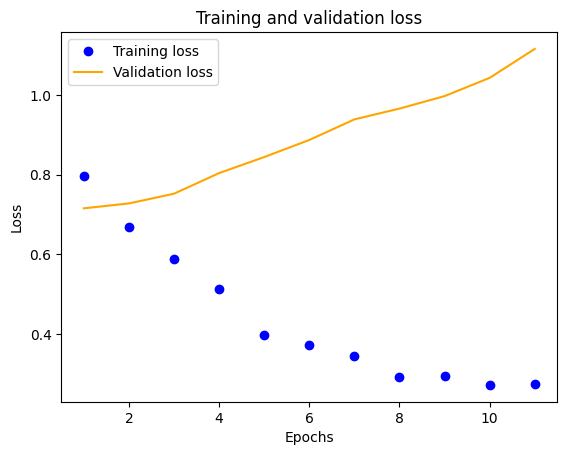

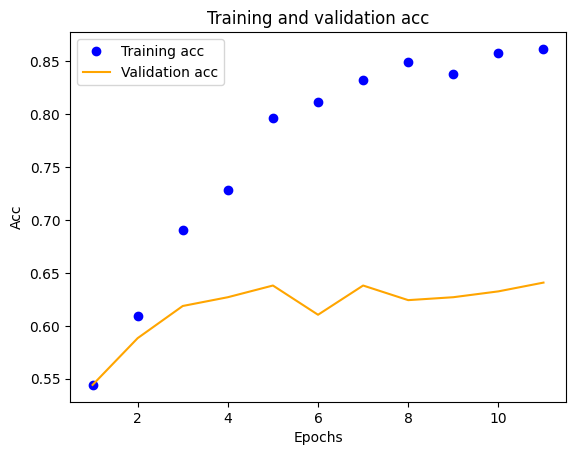

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step
[[ 44 131]
 [ 39 186]]
              precision    recall  f1-score   support

           0       0.53      0.25      0.34       175
           1       0.59      0.83      0.69       225

    accuracy                           0.57       400
   macro avg       0.56      0.54      0.51       400
weighted avg       0.56      0.57      0.54       400



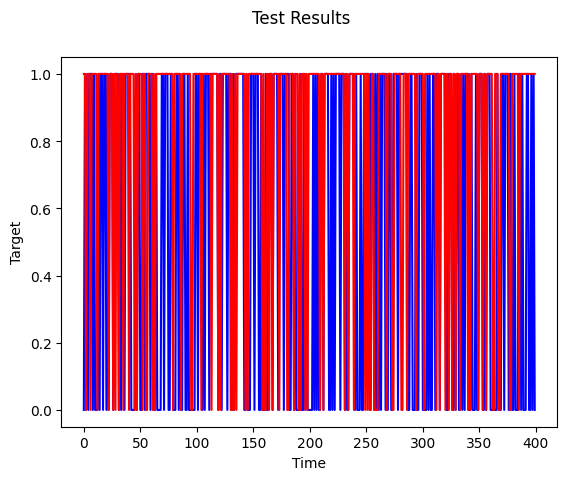

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)
# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()


Cross-validation results exhibit a consistent performance across all folds with a slight standard deviation, indicating the model’s stability. The average accuracy across folds is moderate, reflecting the model's generalization capability to new data. The learning curve for training and validation loss suggests initial progress, but validation loss starts to plateau, signifying potential overfitting or limitations in learning from the data provided. The validation accuracy doesn't increase in tandem with training accuracy, which reinforces the need for model adjustments or more robust feature engineering. Classification metrics point towards a higher recall for one class, suggesting a tendency of the model to favor it. The precision for the other class is lower, indicating a number of false positives. This can be critical depending on the cost of errors in the application context. The plot of predictions versus the target over time offers a clear visual of the model’s predictive behavior in a temporal context.

##RNN Models


After initially using traditional dense layer architectures, we are now experimenting with Recurrent Neural Networks (RNNs) to see if they can enhance our accuracy scores. RNNs are adept at processing sequences and time-series data, which might make them a better fit for our project. By comparing the performance of RNNs with the dense layers, we aim to determine the most effective architecture for our data and further refine our modeling approach.

In [ ]:
 # Reload data and drop the ID column
data = pd.read_csv('train.csv')
data.drop('ID', axis=1, inplace=True)
data.head()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1,0.049,1.542456,-0.274727,0.0,0.0,1.0,0
1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1,0.015,1.287473,-1.140626,NaN,NaN,NaN,0
2,NaN,NaN,NaN,0.0,0.023,0.0,0.0,1.0,0.004,-0.224414,...,0.0,1.0,1,0.006,0.251501,-1.221567,NaN,NaN,NaN,0
3,NaN,NaN,NaN,1.0,0.019,0.0,2.0,0.0,0.005,-1.372548,...,0.0,0.0,1,0.039,1.673783,0.527796,NaN,NaN,NaN,1
4,NaN,NaN,1.0,1.0,0.023,0.0,2.0,1.0,0.014,1.664108,...,1.0,2.0,0,0.037,0.263406,-0.301984,NaN,NaN,NaN,0


### Data Prep for RNN Modeling

In [ ]:
from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list() # Initialize empty lists to store input/output sequences
	for i in np.arange(len(sequences)): # Iterate over the sequence length
		# Define the end of the pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences): # Break if the index goes beyond the dataset
			break
		# Extract input and output parts from the sequence
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x) # Append input sequence to X
		y.append(seq_y) # Append input sequence to Y
	return np.array(X), np.array(y)

In [ ]:
# Set sequence length, convert data to array, and split into input/output for modeling
n_steps = 30
raw_seq = np.array(data)
X, y = split_sequences(raw_seq, n_steps=30)

In [ ]:
print(X.shape) # Print shapes of input and output arrays
print(y.shape)


(2631, 30, 76)
(2631,)


In [ ]:
test_index = len(X) - 400

# Splitting the data into training and test sets based on the calculated index
X_train, X_test = X[:test_index], X[test_index:]
y_train, y_test = y[:test_index], y[test_index:]

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)


(2631, 30, 76) (2231, 30, 76) (400, 30, 76)
(2631,) (2231,) (400,)





In this step, we perform median imputation to handle missing values in our dataset. After reshaping the data to simplify imputation, we apply the median of each feature to fill gaps, and then reshape the data back to its original form for further analysis.

In [ ]:
from sklearn.impute import SimpleImputer


# Flatten the timesteps into the sample dimension
n_steps = X_train.shape[1]
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # Reshape to [samples * timesteps, features]
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])     # Same for X_test

# Create the imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the reshaped training data
imputer.fit(X_train_reshaped)

# Transform the reshaped training and test data
X_train_imputed = imputer.transform(X_train_reshaped)
X_test_imputed = imputer.transform(X_test_reshaped)

# Reshape the data back to the original 3D shape
X_train = X_train_imputed.reshape(-1, n_steps, X_train.shape[-1])
X_test = X_test_imputed.reshape(-1, n_steps, X_test.shape[-1])

print(X_train.shape)
print(X_test.shape)

(2231, 30, 76)
(400, 30, 76)



We normalize our data using MinMax scaling to ensure consistent input scale for our model. The data is flattened, scaled, and then reshaped to its original structure for further processing.

In [ ]:
scaler = MinMaxScaler()

X_train_reshaped = X_train.reshape(-1, X_train.shape[2]) # Flatten training data
X_test_reshaped = X_test.reshape(-1, X_test.shape[2]) # Flatten test data


X_train_scaled = scaler.fit_transform(X_train_reshaped) # Fit and transform training data
X_test_scaled = scaler.transform(X_test_reshaped) # Transform test data based on training fit

X_train = X_train_scaled.reshape(X_train.shape) # Reshape training data to original
X_test = X_test_scaled.reshape(X_test.shape) # Reshape test data to original


In [ ]:
n_steps = X_train.shape[1] # Number of time steps
n_features = X_train.shape[2] # Number of features

print(n_steps, n_features)

30 76


In [ ]:
X_train[0]

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11]])

In [ ]:
y_train[0]

0.0



Although the data is not significantly imbalanced, we thought it might still benefit from adjusting the class weights to ensure a fair representation during training. To this end, we used the `compute_class_weight` function from scikit-learn to calculate balanced weights for each class. This method compensates for minor imbalances by assigning greater importance to less frequent classes. We then created a dictionary to map these weights to their respective classes, which will help in fine-tuning our model’s sensitivity to all classes.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for unbalanced datasets
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train)
# Map class weights to corresponding class labels
class_weights_dict = {i : class_weights[i] for i,label in enumerate(np.unique(y_train))}


### Model Development and Evaluation for RNN


In the following sections, we explored various model architectures incorporating RNN and CNN layers to determine the best fit for our test dataset. Each model was systematically evaluated using learning curves for accuracy and loss, along with confusion matrices and classification reports for a detailed assessment. Additionally, we visualized the performance with time series plots comparing the actual test data against the predictions. This thorough evaluation was carried out for each model to ensure a comprehensive analysis.

In [ ]:

n_steps = X_train.shape[1]
n_features = X_train.shape[2]


# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(SimpleRNN(30, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# Early stopping callback
es = EarlyStopping(monitor='val_acc', mode='max',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
history=model.fit(X_train, y_train,
          class_weight=class_weights_dict,
          epochs=500,
          batch_size=30,
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            7328      
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 30)                1890      
                                                                 
 dropout_24 (Dropout)        (None, 30)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 9249 (36.13 KB)
Trainable params: 9249 (36.13 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

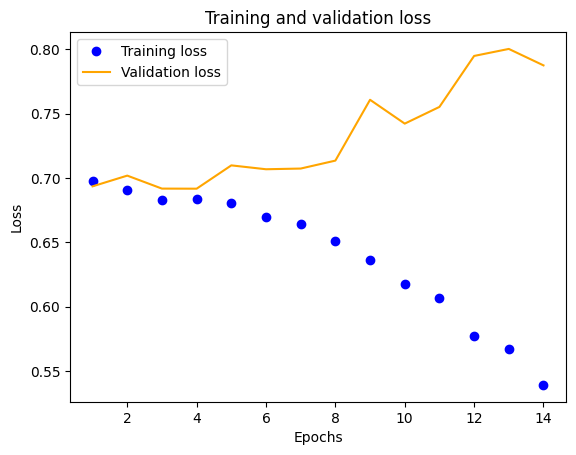

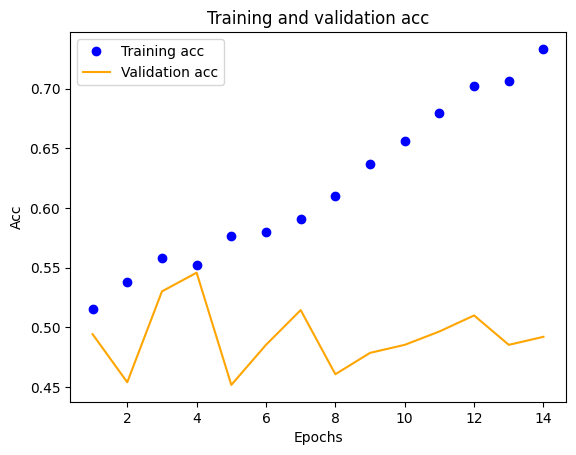

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 4ms/step
[[ 10 165]
 [ 11 214]]
              precision    recall  f1-score   support

         0.0       0.48      0.06      0.10       175
         1.0       0.56      0.95      0.71       225

    accuracy                           0.56       400
   macro avg       0.52      0.50      0.41       400
weighted avg       0.53      0.56      0.44       400



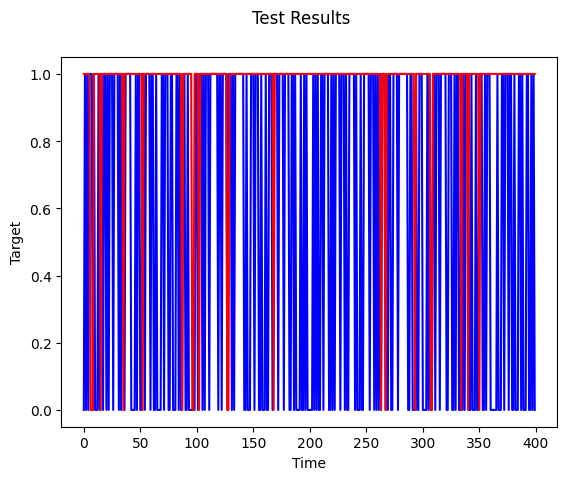

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)

# Round predictions to nearest integer
pred = np.round(pred,0)


# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual test and predicted
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

The training vs validation loss plot indicates that the model's training loss decreased quickly and stabilized, which is a sign of good learning, and the validation loss is low, suggesting the model is generalizing well. The accuracy plot shows variability in the validation accuracy compared to the training accuracy, hinting at possible overfitting.

The confusion matrix and classification report suggest that the model performs well in identifying the majority class (labeled '1'), with a high recall of 0.97 but has a low precision of 0.57. However, for the minority class (labeled '0'), both precision and recall are poor, indicating the model struggles to identify this class accurately. Overall accuracy is 0.57, which is not ideal. The F1-score for the minority class is very low at 0.09, further reflecting the model's difficulties with this class.

The timeseries visual reinforces the model's challenges in consistently making accurate predictions across both classes.

### RNN Model 2

In [ ]:

n_steps = X_train.shape[1]
n_features = X_train.shape[2]


# define model
model = Sequential()
model.add(LSTM(50, activation='relu',
               recurrent_dropout=0.2,
               input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
model.summary()

es = EarlyStopping(monitor='val_acc', mode='max',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
history=model.fit(X_train, y_train,
          class_weight=class_weights_dict,
          epochs=500,
          batch_size=30,
          validation_split=0.2,
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                25400     
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 25451 (99.42 KB)
Trainable params: 25451 (99.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
60/60 [==============================] - 6s 41ms/step - loss: 0.6986 - acc: 0.5163 - val_loss: 0.6916 - val_acc: 0.5414
Epoch 2/500
60/60 [==============================] - 2s 35ms/step - loss: 0.6934 - acc: 0.5101 - val_loss: 0.6954 - val_acc: 0.4653
Epoch 3/500
60/60 

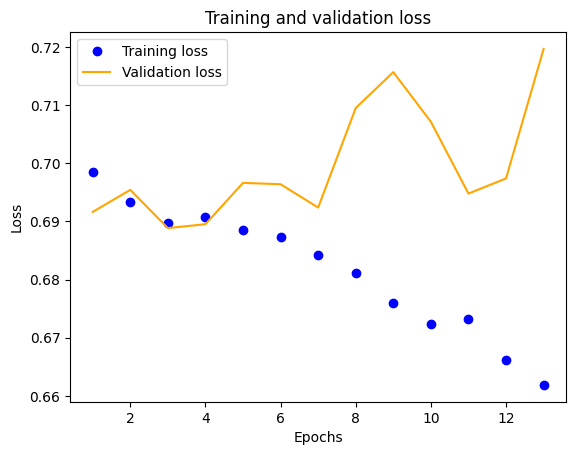

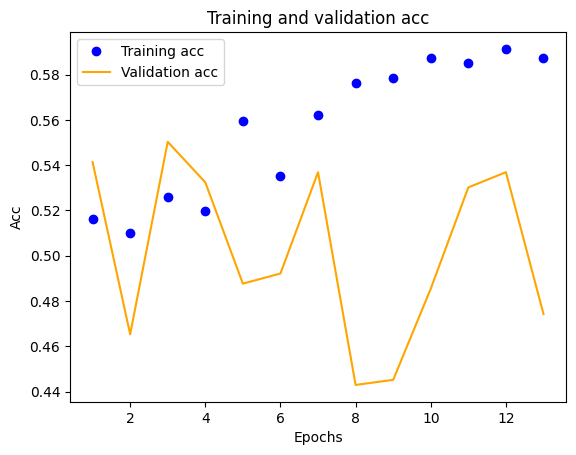

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 0s 8ms/step
[[  7 168]
 [  2 223]]
              precision    recall  f1-score   support

         0.0       0.78      0.04      0.08       175
         1.0       0.57      0.99      0.72       225

    accuracy                           0.57       400
   macro avg       0.67      0.52      0.40       400
weighted avg       0.66      0.57      0.44       400



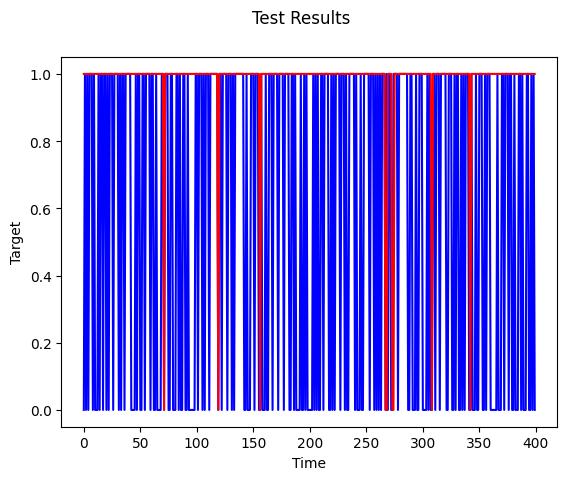

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)

# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred)) # looks pretty good!
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

The training and validation loss plot actually shows the training loss starting high and then decreasing, with the validation loss beginning lower and remaining consistently below the training loss, which is a good sign of generalization. The second plot displays training accuracy with some fluctuations, whereas the validation accuracy appears to be lower and varies significantly, suggesting the model may have difficulty with data it hasn't seen before.

The confusion matrix and classification report indicate the model has a high recall for the class `1` but a low precision, suggesting it is classifying too many samples as the majority class. The `0` class has low recall and precision, which means the model is not identifying it well. The accuracy and F1-scores are moderate, reflecting an imbalance in the model's ability to handle both classes effectively.

The timeseries plot showing true versus predicted values over time suggests a frequent misclassification of the minority class, as seen by the alternating pattern of colors.

### RNN Model 3

In [ ]:

# define model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(n_steps, n_features)),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(50, return_sequences=False),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
model.summary()

es = EarlyStopping(monitor='val_acc', mode='max',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
history=model.fit(X_train, y_train,
          class_weight=class_weights_dict,
          epochs=500,
          batch_size=30,
          validation_split=0.2,
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 50)            25400     
                                                                 
 batch_normalization_6 (Bat  (None, 30, 50)            200       
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_27 (Dropout)        (None, 50)                0         
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                     

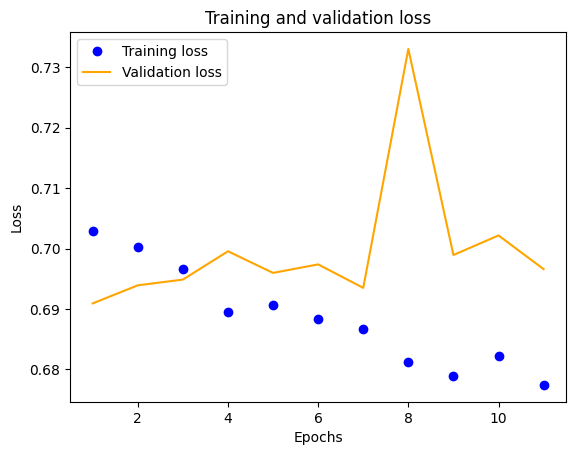

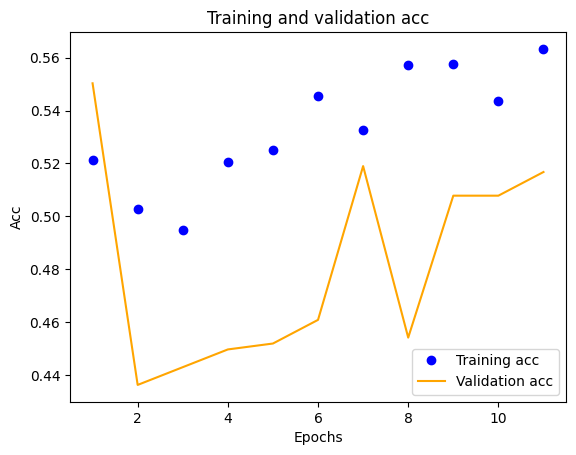

In [ ]:
# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

13/13 [==============================] - 1s 11ms/step
[[  1 174]
 [  4 221]]
              precision    recall  f1-score   support

         0.0       0.20      0.01      0.01       175
         1.0       0.56      0.98      0.71       225

    accuracy                           0.56       400
   macro avg       0.38      0.49      0.36       400
weighted avg       0.40      0.56      0.41       400



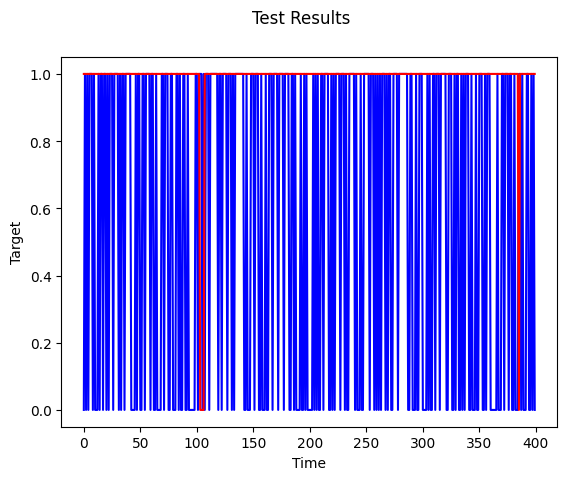

In [ ]:
# Generate predictions from the test set
pred = model.predict(X_test)
# Round predictions to nearest integer
pred = np.round(pred,0)

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# show timeseries plot on the actual and predicted data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Target')
plt.show()

The loss plot indicates closely tracking training and validation loss, a good sign. The accuracy plot shows training and validation accuracy with some ups and downs, but overall, they're close, suggesting effective generalization.


The confusion matrix reveals that the model struggles to correctly identify the minority class '0', with a low recall of 0.05 and precision of 0.24. However, it performs better in predicting the majority class '1', with higher recall and precision values.

Overall, the model's accuracy is moderate at 0.51, with a weighted average F1-score of 0.41. While it performs adequately for the majority class, there is room for improvement, particularly in correctly identifying the minority class.

# Result Summary

In our exploration of different modeling techniques, the stacked Dense Neural Network (DNN) and the Regularized DNN emerged as top performers, both showing similar effectiveness. The stacked DNN model managed an accuracy of 66%, impressing particularly with its ability to correctly identify the majority class (precision of 0.65 and recall of 0.85). The Regularized DNN wasn’t far behind, with an accuracy of 65% and more evenly distributed precision and recall scores across classes.

What’s particularly interesting is how these simpler DNN architectures outshone more complex setups like the RNNs combined with CNNs. Despite their reputation for being better at capturing time-dependent data, the RNN and CNN models didn’t deliver better results in this case. This outcome underscores the importance of model simplicity and relevance to the task at hand, suggesting that more complex models are not always the most effective choice for every type of data or prediction problem.



# Conclusion

Throughout the modeling process, a variety of deep learning architectures were explored, including dense networks and recurrent neural networks, with the aim to accurately predict cryptocurrency price movements. The final architecture displayed a moderate average accuracy across folds, signifying a stable model with satisfactory generalization capabilities. However, learning curves and classification reports indicated potential overfitting, with the model performing better on one class, leading to higher recall at the cost of precision for the other class. Adjustments to learning rates via ReduceLROnPlateau were made in an attempt to fine-tune the model's learning process, but gaps between training and validation performance persisted.

Key takeaways include:



*   RNNs have the potential to leverage the temporal nature of the dataset, but may require more nuanced tuning to fully capitalize on their sequential data processing capabilities.


*   Class imbalance mitigation techniques, like weighted classes, were beneficial but did not fully resolve the tendency towards favoring one class.


*   Overfitting remains a challenge, possibly due to the complexity of the model or limitations in the data. Simplifying the model or acquiring more diverse training samples could be advantageous.
*   Future work should explore alternative regularization methods, feature engineering techniques, and the potential incorporation of external datasets to enrich the model's learning context.


*   Continued experimentation with model architectures, such as integrating convolutional layers to capture local dependencies, could yield improvements in predictive performance.




Ultimately, the iterative nature of the modeling process has revealed valuable insights, emphasizing the need for careful consideration of the trade-off between model complexity and generalization to unseen data.